In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 데이터 불러오기
df = pd.read_csv('bitcoin_data.csv')
df.dropna(inplace=True)

# 이동평균 계산
df['OBV'] = ta.OBV(df['close'], df['volume'])
df.dropna(inplace=True)

# 입력 데이터와 타겟 값 생성
X = df[['OBV']].values
Y = df['close'].values

# 데이터 스케일링
scaler = MinMaxScaler()

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, shuffle=False,
                                                    random_state=0)

# X 학습 테스트
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Y 학습 테스트
Y_train = scaler.fit_transform(Y_train.reshape(-1, 1)).flatten()
Y_test = scaler.fit_transform(Y_test.reshape(-1, 1)).flatten()

# 전체 비교용 X Y
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

# 모델 구축
model = LinearRegression()

# 모델 학습
model.fit(X_train, Y_train)

# 테스트 데이터 예측
Y_pred = model.predict(X_test)
Y_pred_all = model.predict(X_scaled)

# 예측 결과 역스케일링
Y_pred_scaled = scaler.inverse_transform(Y_pred.reshape(-1, 1)).flatten()
Y_pred_scaled_all = scaler.inverse_transform(Y_pred_all.reshape(-1, 1)).flatten()
Y_test_scaled = scaler.inverse_transform(Y_scaled.reshape(-1, 1)).flatten()

print(Y_pred_scaled)

[50474830.27931405 48704559.12551527 47414304.39957345 46671528.54454988
 46024869.24220253 47665882.59775869 46039650.90297219 47121328.49495251
 48352365.95848753 47241618.63762426 46431178.72716094 47555196.37494562
 48574558.54906189 47500322.62803105 49022453.68639154 46581907.24713077
 44993875.17548506 44320400.94468337 42718070.61909458 39479308.38052504
 44187627.57903457 31724265.02660277 22605371.56647957 27439443.69225198
 29588530.36869851 31256296.18726907 29042240.84265817 31130723.85135122
 28648190.9924446  31146275.96423662 28859400.4651938  29956381.44509586
 31257219.20420706 29328403.9777186  30819215.76203762 32328471.12778288
 30300204.40775533 28594920.44776418 29348105.69872325 30015831.20492302
 32147476.43844245 34659455.9451287  32201344.28032341 33331736.88345847
 31925465.53803502 32471807.09921998 32986533.17809479 34691169.63125331
 31616457.99129349 29607480.46811952 28459229.43618717 26732373.72443667
 24974153.68955013 22577830.90812987 14354488.11012

In [3]:
r2_train = r2_score(Y_train, model.predict(X_train))
r2_test = r2_score(Y_test, model.predict(X_test))

print(f"[r2_score] train : {r2_train} / test : {r2_test}")

# mse
mse = mean_squared_error(Y_test, Y_pred)
# rmse
rmse = np.sqrt(mse)

print(f'[MSE] : {mse:.3f}\n[RMSE] : {rmse:.3f}')

[r2_score] train : 0.5113549516018936 / test : 0.38082525665826505
[MSE] : 0.030
[RMSE] : 0.172


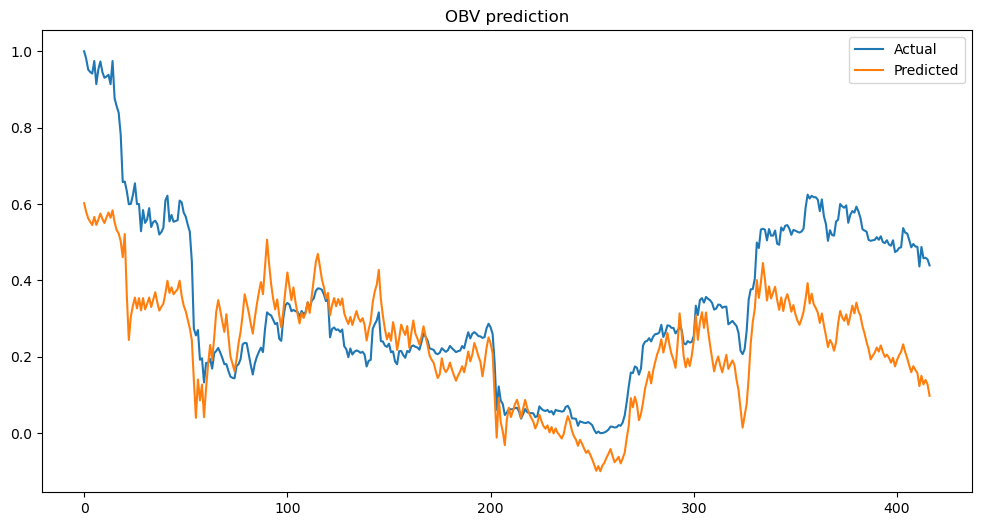

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.title('OBV prediction')
plt.legend()
plt.show()